# Compare Straightness in Biological Models

Align Biological Models and compare straightness

In [1]:
import numpy
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
import matplotlib as mpl

## Import .csv files

In [2]:
networks = [#['vonenet','vonenet_alexnet'],
            ['vonenet','vonenet_cornets'],
            #['vonenet','vonenet_resnet50'],
            ['henaffbio','henaffbio'],
            ['brucenet','brucenet_brucenet_150'],
            ['brucenet','brucenet_brucenet_PSPyr'],
           ]

hs_path = '/home/gridsan/groups/RosenholtzLab/PredStraightening/Henaff_straightening'

colnames = ['network','variant','free_params','test_acc','adversarial_acc','training_epoch_time','MSE','perceptual_loss',
            'layer_names','natural_curves','natural_ste','contrast_curves',
            'contrast_ste','artificial_curves','artificial_ste']

table = np.expand_dims(np.array(colnames),axis=1)
for net, variant in networks:
    csv_fpath = os.path.join(hs_path, f'{net}_curves', f'{variant}.csv')
    with open(csv_fpath,'r') as file:
        reader = csv.reader(file,delimiter='\t')
        next(reader, None)
        for row in reader:
            row = net+','+variant+','+row[0]
            row = np.expand_dims(np.array(row.split(','),dtype=str),axis=-1)
            #print(row.shape)
            #print(net,variant)
            table = np.append(table,row,axis=1)

print(table.shape)
#print(table)

(15, 20)


## Clean Table

In [11]:
import pandas as pd
df = pd.DataFrame(table.T).replace('nan', np.nan) #replace NaN
df = df.replace('Final Output', 'output') #replace NaN
df = df.replace('Output', 'output') #replace NaN
df = df.replace('V1', 'output') #replace v1 with output for henaffbio

#clean up table
df.columns = df.iloc[0]
df = df[1:]
df = df.drop(['free_params','test_acc','adversarial_acc','training_epoch_time','MSE','perceptual_loss'],axis=1)
df

#rename veonenet output as V1
#df.loc[(df['network']=='vonenet') & (df['layer_names']=='VOneOut'),'layer_names'] = 'V1'
#rename brucenet output as V2
df.loc[(df['network']=='brucenet') & (df['layer_names']=='output'),'layer_names'] = 'V2'
#rename henaffbio output as V1
df.loc[(df['network']=='henaffbio') & (df['layer_names']=='output'),'layer_names'] = 'V1'
df

#don't use layers not from list
layers = ['Pixel','Retina/LGN','Simple','V1','VOneOut','V2','V4','IT']
layers_num = [1,2,2.9,3,3.1,4,5,6]
df = df[df['layer_names'].isin(layers)]

#give ordering to layers
def order_layers(row):
    if row['layer_names']=='Pixel':
        return(1)
    elif row['layer_names']=='Retina/LGN':
        return(2)
    elif row['layer_names']=='Simple':
        return(2.9)
    elif row['layer_names']=='V1':
        return(3)
    elif row['layer_names']=='VOneOut':
        return(3.1)
    elif row['layer_names']=='V2':
        return(4)
    elif row['layer_names']=='V4':
        return(5)
    elif row['layer_names']=='IT':
        return(6)
        
df['layer_names_order'] = df.apply(lambda r: order_layers(r),axis=1)
df

,network,variant,layer_names,natural_curves,natural_ste,contrast_curves,contrast_ste,artificial_curves,artificial_ste,layer_names_order
1,vonenet,vonenet_cornets,Pixel,81.10346221923828,6.611190319061279,0.005730518605560064,0.0012690485455095768,0.004864321555942297,0.0015796050429344177,1.0
4,vonenet,vonenet_cornets,Simple,68.23886108398438,7.5782904624938965,4.5057806968688965,0.39081358909606934,10.98355770111084,0.633746862411499,2.9
6,vonenet,vonenet_cornets,VOneOut,119.66970825195312,0.07776197791099548,119.91993713378906,0.023332100361585617,119.91316986083984,0.018657440319657326,3.1
8,vonenet,vonenet_cornets,V2,113.6615982055664,1.42503023147583,118.86726379394531,0.26798003911972046,117.46744537353516,0.27626997232437134,4.0
9,vonenet,vonenet_cornets,V4,115.17333984375,1.1829776763916016,117.11354064941406,0.8128490447998047,115.91275787353516,0.667270839214325,5.0
10,vonenet,vonenet_cornets,IT,116.3309097290039,0.8374936580657959,114.0300521850586,1.596633791923523,114.77779388427734,0.787506103515625,6.0
13,henaffbio,henaffbio,Pixel,82.82018280029297,NaN,0.01126942690461874,NaN,0.005918897222727537,NaN,1.0
14,henaffbio,henaffbio,Retina/LGN,75.94478607177734,NaN,5.414645195007324,NaN,11.761431694030762,NaN,2.0
15,henaffbio,henaffbio,V1,57.65815353393555,NaN,5.0623955726623535,NaN,18.092445373535156,NaN,3.0
16,brucenet,brucenet_brucenet_150,Pixel,81.10346221923828,6.905162811279297,0.005730518605560064,0.00120999023783952,0.004864321555942297,0.0016498435288667679,1.0


## Plot Output Layers

/state/partition1/llgrid/pkg/anaconda/anaconda3-2022b/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


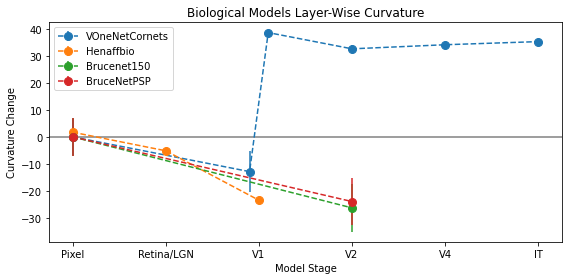

In [25]:
#extract models
v1c = df[df['variant']=='vonenet_cornets']
v1a = df[df['variant']=='vonenet_alexnet']
v1r = df[df['variant']=='vonenet_resnet50']

hb = df[df['variant']=='henaffbio']
bn150 = df[df['variant']=='brucenet_brucenet_150']
bnpsp = df[df['variant']=='brucenet_brucenet_PSPyr']

pixel_offset= 81.10346221923828

# #subtract start at pixel stage
# v1c = v1c[
# hb = df[df['variant']=='henaffbio']
# bn150 = df[df['variant']=='brucenet_brucenet_150']
# bnpsp = df[df['variant']=='brucenet_brucenet_PSPyr']

#plots
# plt.errorbar(np.array(v1a['layer_names_order'],dtype=np.float32),
#              np.array(v1a['natural_curves'],dtype=np.float32)-pixel_offset,
#              yerr=np.array(v1a['natural_ste'],dtype=np.float32),
#              marker = 'o', linestyle='--',markersize=8,label='VOneNetAlexnet')
# plt.errorbar(np.array(v1r['layer_names_order'],dtype=np.float32),
#              np.array(v1r['natural_curves'],dtype=np.float32)-pixel_offset,
#              yerr=np.array(v1r['natural_ste'],dtype=np.float32),
#              marker = 'o', linestyle='--',markersize=8,label='VOneNetResNet50')

plt.figure(figsize=(8,4))

plt.errorbar(np.array(v1c['layer_names_order'],dtype=np.float32),
             np.array(v1c['natural_curves'],dtype=np.float32)-pixel_offset,
             yerr=np.array(v1c['natural_ste'],dtype=np.float32),
             marker = 'o', linestyle='--',markersize=8,label='VOneNetCornets')
plt.errorbar(np.array(hb['layer_names_order'],dtype=np.float32),
             np.array(hb['natural_curves'],dtype=np.float32)-pixel_offset,
             yerr=np.array(hb['natural_ste'],dtype=np.float32),
             marker = 'o', linestyle='--',markersize=8,label='Henaffbio')
plt.errorbar(np.array(bn150['layer_names_order'],dtype=np.float32),
             np.array(bn150['natural_curves'],dtype=np.float32)-pixel_offset,
             yerr=np.array(bn150['natural_ste'],dtype=np.float32),
             marker = 'o', linestyle='--',markersize=8,label='Brucenet150')
plt.errorbar(np.array(bnpsp['layer_names_order'],dtype=np.float32),
             np.array(bnpsp['natural_curves'],dtype=np.float32)-pixel_offset,
             yerr=np.array(bnpsp['natural_ste'],dtype=np.float32),
             marker = 'o', linestyle='--',markersize=8,label='BruceNetPSP')

#make it pretty
plt.legend()

layers_plot = ['Pixel','Retina/LGN','V1','V2','V4','IT']
layers_num_plot = [1,2,3,4,5,6]

plt.xticks(layers_num_plot,layers_plot)
plt.axhline(0,linestyle='-',c='gray')
plt.xlabel('Model Stage')
plt.ylabel('Curvature Change')
plt.title('Biological Models Layer-Wise Curvature')
plt.tight_layout()
plt.savefig(os.path.join(hs_path,'output_plots','bio_model_layers_aligned.png'))